In [104]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [105]:
import numpy as np
import pandas as pd

In [106]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [107]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [108]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [109]:
#
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [110]:
# Save references to each table
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [111]:
# Save references to each table
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [112]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [113]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [114]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [115]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
StartDate = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).first()
#unpack the tuple
StartDate = StartDate[0]
StartDate

# Calculate the date 1 year ago from the last data point in the database
Rain_Last_Year_df = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').all()
#Rain_Last_Year_df

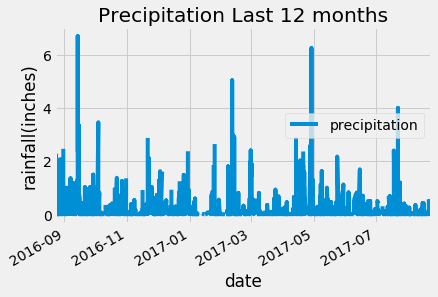

In [116]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Rain_Last_Year_df = pd.DataFrame(query,columns=['date', 'precipitation'])
Rain_Last_Year_df

# Change datatype from element to datetime object on Pandas
### MUST DO THIS TO PLOT PROPERLY ###
Rain_Last_Year_df['date'] = pd.to_datetime(Rain_Last_Year_df['date'], format='%Y-%m-%d')
Rain_Last_Year_df

# Set index to date
Rain_Last_Year_df.set_index('date', inplace=True)
Rain_Last_Year_df

# Use Pandas Plotting with Matplotlib to plot the data
Rain_Last_Year_df.plot(title="Precipitation Last 12 months")
plt.ylabel('rainfall(inches)')
#plt.savefig("Images/Precipitation.png")
plt.show()

In [117]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Rain_Last_Year_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [118]:
# Design a query to show how many stations are available in this dataset?
TotalStations = session.query(Station.station).count()
print(f"There are {TotalStations} Stations")

There are 9 Stations


In [119]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
ActiveStations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
ActiveStations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [120]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
TopStationTemps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
TopStationTemps

[(54.0, 85.0, 71.66378066378067)]

In [121]:
# Choose the station with the highest number of temperature observations.
TopTempStations = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
TopTempStations

('USC00519281', 2772)

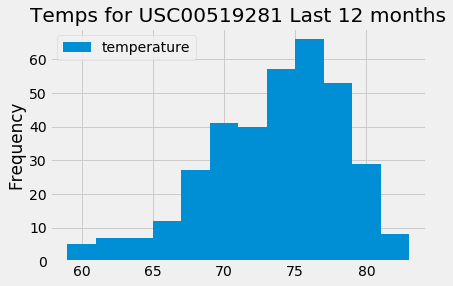

In [122]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
TTS_df = session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-22', Measurement.station == 'USC00519281').all()
TTS_df

# Save the query results as a Pandas DataFrame
TTS_df = pd.DataFrame(TTS_df,columns=['temperature'])
TTS_df

# Use Pandas Plotting with Matplotlib to plot the data as a histogram
TTS_df.plot.hist(bins=12, title="Temps for USC00519281 Last 12 months")
#plt.savefig("Images/temperature.png")
plt.show()

## Bonus Challenge Assignment

In [123]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [124]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [125]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [126]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [127]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [128]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [129]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [130]:
# Plot the daily normals as an area plot with `stacked=False`


Stuff I tried

In [131]:
# date 1 week ago from today
#week_ago = dt.date.today() - dt.timedelta(days=7)

#sel = [Measurement.date, 
 #      func.sum(Measurement.prcp)] 
#Rain_Last_Year_df = session.query(*sel).\
 #   filter(func.strftime("%d", Measurement.date) > '2016-08-22').\
  #  group_by(Measurement.date).\
   # order_by(Measurement.date.desc()).all()
#Rain_Last_Year_df

# Design a query to retrieve the last 12 months of precipitation data and plot the results
#max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Get the first element of the tuple
#max_date = max_date[0]

# Calculate the date 1 year ago from the last data point in the database
#year_ago = dt.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days=366)
#year_ago

# Perform a query to retrieve the data and precipitation scores
#query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
#query
